In [2]:
%matplotlib inline

import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp
from scipy.optimize import minimize

/home/martijn/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/martijn/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


0.2 a The Friis free space equation consists of:

$$P_r = P_t + 20 \times \log^{10}{\frac{c}{4\pi f r}}$$

where P_t equals the transmission power, c the speed of sound, f the frequency and r the distance. Plotting this for f is 2.4Ghz and r between 0.4 and 30 metres results in the following plot:

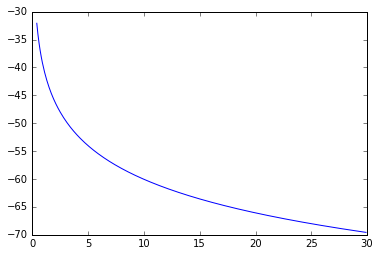

In [3]:
c  = scipy.constants.speed_of_light
f  = 2.4e9
r  = np.arange(0.4, 30, 0.1)
Pt = 0
P  = Pt + 20 * np.log10(c/(4.* np.pi * f * r))

plt.figure(1)
plt.plot(r,P)
plt.show()

b: This equation can also be inverted to r as a function of P_r:
    
$$r = \frac{c}{4 \pi f 10^{\frac{P_r - P_t}{20}}}$$

In [4]:
def getDistance(Pr):
    return c/(4*np.pi*f*math.pow(10, (Pr-Pt)/20))

d30 = getDistance(-31) - getDistance(-30)
d60 = getDistance(-61) - getDistance(-60)

print("The difference in metres between -30 to -31 and -60 to -61 is:", d30, "and", d60)

The difference in metres between -30 to -31 and -60 to -61 is: 0.03835527636485858 and 1.2129003359817592


c: As can be seen above, the difference in distance between 30 and 31 dBm is 0.0384 metres and between -60 and -61 dBm is 1.21 metres. This that with a lower signal strength the difference in strength has a larger influence on the difference in distance.

d: This also means that the uncertainty for the distance is larger when the signal strength is smaller. As an error in the measured signal strength has a larger influance on the resulting calculated distance.

0.3 e: In order to reconstruct the location of the client triangulation can be used. There excists unfortunatly no exact solution as can be seen in the picture below:

**MARTIJN PLAATJE PAINT :D**

f: To Calculate the signal strength of a client at a certain location with a certain router the original formula can be rewritten to:

$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f r}})$$
$$P_r = P_t + 20 \times (\log^{10}({\frac{c}{4\pi f}}) - \log^{10}({r}))$$
$$P_r = P_t + 20 \times (\log^{10}({\frac{c}{4\pi f}}) - \log^{10}(\sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2}))$$
$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f}}) - 20 \times \log^{10}(\sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2})$$
$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f}}) - 20 \times \log^{10}(((x-x_i)^2 + (y-y_i)^2 + Z^2)^\frac{1}{2})$$
$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f}}) - 10 \times \log^{10}((x-x_i)^2 + (y-y_i)^2 + Z^2)$$



g: **LEG RESULTATEN ONDER UIT**

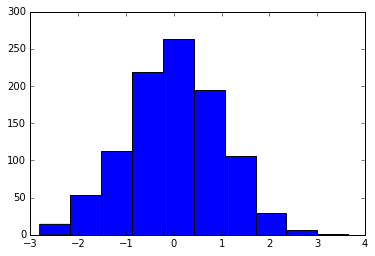

The mean and deviation are: 0.00406697237745 and 0.975927377485


In [5]:
def getExpectedStrength(x, y, xi, yi, Z, Pt):
    return (Pt + 20 * np.log10(c/(4*np.pi*f)) -
            10*np.log10(math.pow(x-xi,2) + math.pow(y-yi,2) + math.pow(Z,2)))

def getMeassuredStrength(x, y, xi, yi, Z, Pt, G, sigma):
    return (Pt + G * np.log10(c/(4*np.pi*f)) -
            10*np.log10(math.pow(x-xi,2) + math.pow(y-yi,2) + math.pow(Z,2)) +
            np.random.normal(0, sigma))
Z = 2
G = 20

sigma = 1
expectedStrength = getExpectedStrength(20, 0, 0, 0, Z, 0)
meassurements = [getMeassuredStrength(20, 0, 0, 0, Z, 0, G, sigma) for x in range(1000)]
nRisiduals = (meassurements - expectedStrength)/sigma
plt.hist(nRisiduals, bins=10)
plt.show()

mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)

print("The mean and deviation are:", mean, "and", mu)

h: **LEG RESULTATEN ONDER UIT**

The mean and deviation when underestimating are: 0.0532499014013 and 2.0505806605


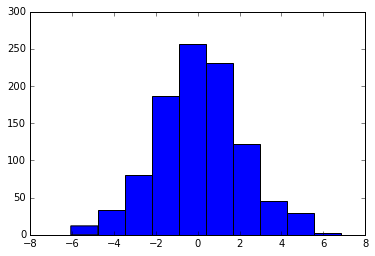

The mean and deviation when overestimating are: 0.0133124753503 and 0.512645165125


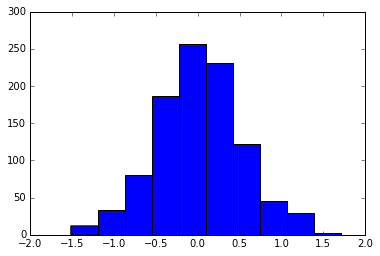

In [6]:
sigma = 2
expectedStrength = getExpectedStrength(20, 0, 0, 0, Z, 0)
meassurements = [getMeassuredStrength(20, 0, 0, 0, Z, 0, G, sigma) for x in range(1000)]

# Underestimate
nRisiduals = (meassurements - expectedStrength)/1
mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)
print("The mean and deviation when underestimating are:", mean, "and", mu)
plt.hist(nRisiduals, bins=10)
plt.show()

# Overestimate
nRisiduals = (meassurements - expectedStrength)/4
mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)
print("The mean and deviation when overestimating are:", mean, "and", mu)
plt.hist(nRisiduals, bins=10)
plt.show()

i: **EXPLAINED RESULTS BELOW** (mean is no longer 0 due to systematic error)

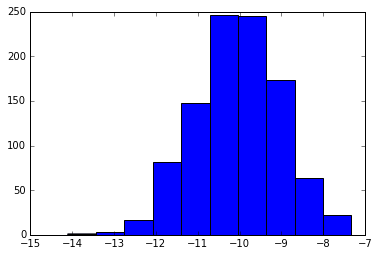

The mean and deviation are: -10.0488355371 and 1.01472132651


In [7]:
G = 25

sigma = 1
expectedStrength = getExpectedStrength(20, 0, 0, 0, Z, 0)
meassurements = [getMeassuredStrength(20, 0, 0, 0, Z, 0, G, sigma) for x in range(1000)]
nRisiduals = (meassurements - expectedStrength)/sigma
plt.hist(nRisiduals, bins=10)
plt.show()

mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)

print("The mean and deviation are:", mean, "and", mu)

j: mean of zero and a standard deviation of one? **CHECK PLS**

0.4 k: When generating a single wifi packet without noise and an assumed sigma of 1dBm, the $\chi^{2}$ is at its minimum at (5,5) which is the actual position:

In [8]:
def estimatePositionWithoutNoise(routers, assumedClient, actualClient, sigma, G, Pt):
    x,y,z = assumedClient
    xreal, yreal, zreal = actualClient
    Chi = 0
    for xi,yi,zi in routers:
        Z = zi - z
        Si = getExpectedStrength(x,y,xi,yi,Z,Pt)
        Pri = getExpectedStrength(xreal,yreal,xi,yi,zreal-zi,Pt)
        Chi += math.pow(Si-Pri,2)/math.pow(sigma,2)
    return Chi



routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
actualClient = [5,5,1]
X = np.arange(-5,16,1)
Chis = [[x, estimatePositionWithoutNoise(routers, [x,5,1], actualClient, 1, 20, 0)] for x in X]

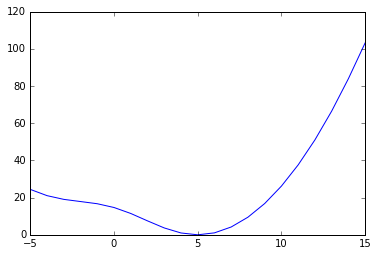

In [9]:
Chis = np.matrix(Chis)
plt.plot(Chis[:,0],Chis[:,1])
plt.show()

0.4 l: When generating a single wifi packet with random Gaussian noise and a sigma of 1dBm, the $\chi^{2}$ is at its minimum around (5,5) which is the actual position, but not necessarily exactly at (5,5):

In [76]:
def estimatePositionWithNoise(routers, assumedClient, actualClient, sigma, G, Pt, unc=sigma):
    x,y,z = assumedClient
    xreal, yreal, zreal = actualClient
    Chi = 0
    for xi,yi,zi in routers:
        Z = zi - z
        Si = getExpectedStrength(x,y,xi,yi,Z,Pt)
        Pri = getMeassuredStrength(xreal,yreal, xi, yi, zreal-zi, Pt, G, sigma)
        
        Chi += math.pow(Si-Pri,2)/math.pow(unc,2)
    return Chi

routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
actualClient = [5,5,1]
X = np.arange(-5,16,0.1)
Chis = [[x, estimatePositionWithNoise(routers, [x,5,1], actualClient, 1, 20, 0)] for x in X]

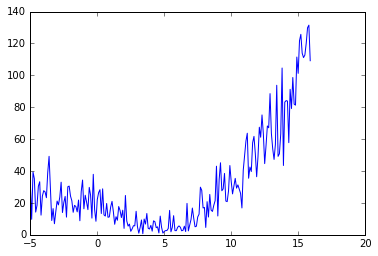

In [71]:
Chis = np.matrix(Chis)
plt.plot(Chis[:,0],Chis[:,1])
plt.show()

0.4 m: The minimize function (the Powell method) will find the optimum of the estimated position at location (5,5).

In [72]:
def g(X):
    x,y = X
    routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
    actualClient = [5,5,1]
    return estimatePositionWithoutNoise(routers, [x,y,1], actualClient, 1, 20, 0)

print(minimize(g,[3,8], method='Powell').x)
    

[ 5.  5.]


0.4n: The average estimated position is quite good, however, the $\chi^{2}$ value is very high.

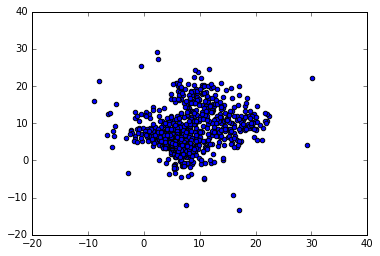

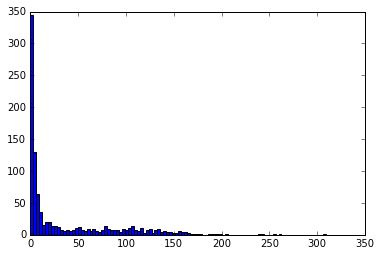

Chi squared= 36.380139972
Position= [[ 7.57288006  7.5836462 ]]


In [82]:
def g2(X):
    x,y = X
    routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
    actualClient = [5,5,1]
    return estimatePositionWithNoise(routers, [x,y,1], actualClient, 1 ,20, 0)

results = []
Chis = []
#print(minimize(g2,[10,10], method='Powell'))

for i in range(0,1000):
    randx = np.random.rand()*19
    randy = np.random.rand()*19
    minimized = minimize(g2,[randx,randy], method='Powell')
    results.append(minimized.x)
    Chis.append(minimized.fun)

results = np.matrix(results)
plt.scatter(results[:,0],results[:,1])
plt.show()

plt.hist(Chis, bins=100)
plt.show()

print("Chi squared =", np.mean(Chis))
print("Position =", results.mean(0))

0.4o: No, if we take random starting poisitions the $\chi^{2}$ is about 25 times as high as it should be (should be 2), however, if we take starting positions that are relatively close to the actual positions then the $\chi^{2}$ decreses rapidly.

0.4p: Up to a certain point the distributions overlap nicely, however, the closer it gets to zero the further the distrubtions are apart.

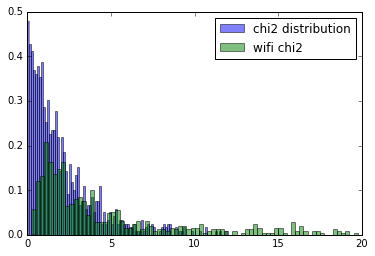

In [74]:
plt.hist(np.random.chisquare(2,1000), alpha=0.5, bins=100,label='chi2 distribution',normed=True)
plt.hist(Chis, bins=1000, alpha=0.5, label='wifi chi2', normed=True)
plt.xlim(0,20)
plt.ylim(0,0.5)
plt.legend()
plt.show()


0.4q: 

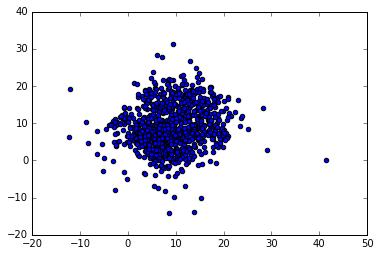

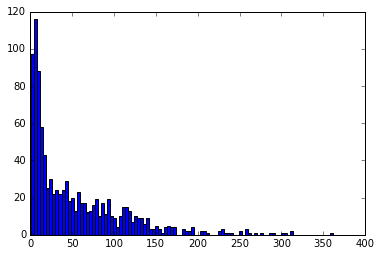

53.6588688611
[[ 9.01185696  8.85312309]]


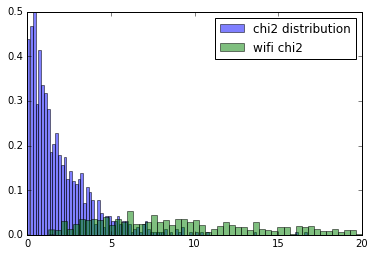

In [81]:
def g2(X):
    x,y = X
    routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
    actualClient = [5,5,1]
    return estimatePositionWithNoise(routers, [x,y,1], actualClient, 2 ,20, 0, 1)

results = []
Chis = []
#print(minimize(g2,[10,10], method='Powell'))

for i in range(0,1000):
    randx = np.random.rand()*19
    randy = np.random.rand()*19
    minimized = minimize(g2,[randx,randy], method='Powell')
    results.append(minimized.x)
    Chis.append(minimized.fun)

results = np.matrix(results)
plt.scatter(results[:,0],results[:,1])
plt.show()

plt.hist(Chis, bins=100)
plt.show()

print(np.mean(Chis))
print(results.mean(0))

plt.hist(np.random.chisquare(2,1000), alpha=0.5, bins=100,label='chi2 distribution',normed=True)
plt.hist(Chis, bins=1000, alpha=0.5, label='wifi chi2', normed=True)
plt.xlim(0,20)
plt.ylim(0,0.5)
plt.legend()
plt.show()

The average x- and y- values are approaching the geometric center of the four routers and away from the actual location. If the routers recieved purely random measurements then the average would be the exact center, (10,10), so these results agree with increasing the measurement uncertainty

The average $\chi^{2}$ of minimum has increased by almost a factor of 2. This makes sense as more noise = higher uncertainty = lower likelihood = high $\chi^{2}$



0.4r:


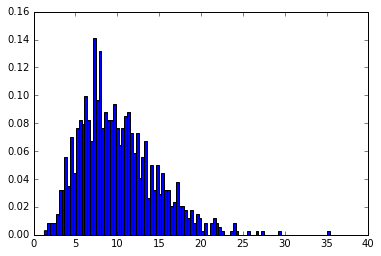

In [79]:
plt.hist(np.random.chisquare(10,1000), bins=100,label='chi2 distribution',normed=True)
plt.show()